In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [2]:
df  = pd.read_csv("C://Users//rakes//Desktop//MLP//mlp videos//Real_fake_news (1).csv")

In [3]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,0,0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,1,1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,2,2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,3,3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,4,4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1


In [4]:
## DATA PRE-PROCESSING

#Finding out missing values in each column
print(df.isna().sum())
missing_status=df.isna().sum()
##print(df.isnull().sum())

Unnamed: 0         0
Unnamed: 0.1       0
author             0
statement          0
source             0
target             0
BinaryTarget       0
BinaryNumTarget    0
dtype: int64


In [5]:
df[df.duplicated(keep = 'last')] 

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget


In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'author', 'statement', 'source', 'target',
       'BinaryTarget', 'BinaryNumTarget'],
      dtype='object')

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.author = le.fit_transform(df.author)
df.source = le.fit_transform(df.source)
df.head(3)

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,0,0,128,"New York is ""leading the nation with the lowes...",1035,True,REAL,1
1,1,1,82,“Iowa ranks 45th in the U.S. for internet conn...,247,True,REAL,1
2,2,2,87,“FUN FACT: West Virginia is home to zero billi...,321,True,REAL,1


In [8]:
X=df[['author','source']]
Y=df[['BinaryNumTarget']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [9]:
df.nunique()

Unnamed: 0         2436
Unnamed: 0.1       2436
author              318
statement          4866
source             1493
target                2
BinaryTarget          2
BinaryNumTarget       2
dtype: int64

In [10]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, Y_train)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [11]:
Y_pred = knn.predict(X_test)

In [12]:
confusion_matrix(Y_test, Y_pred)

array([[477, 128],
       [ 81, 532]], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8284072249589491

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

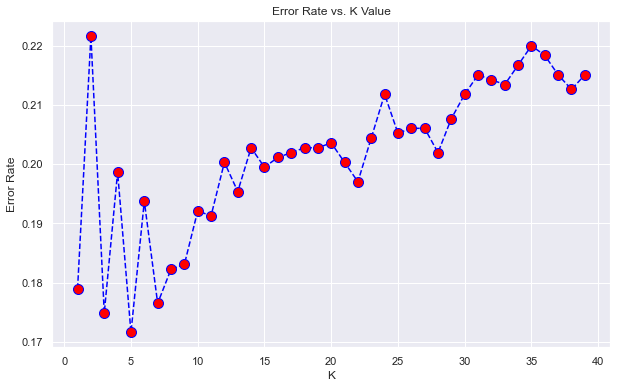

Minimum error:- 0.17159277504105086 at K = 5


In [14]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(Y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import export_graphviz
import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [16]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [17]:
X=df[['author','source']]
Y=df[['BinaryNumTarget']]

In [18]:
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

StandardScaler()

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                                     X,
                                                     Y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = Y
                                                    )

In [20]:
X_train.shape 
print()

X_test.shape  
print()

(3409, 2)

(1461, 2)

In [21]:
ct = dtree(
           criterion="gini",    
           max_depth=None      
           )

In [22]:
ct.fit(X_train,Y_train)

DecisionTreeClassifier()

In [23]:
Y_pred = ct.predict(X_test)

In [24]:
print("Accuracy:",accuracy_score(Y_test, Y_pred))

Accuracy: 0.8692676249144422


<Figure size 864x504 with 0 Axes>

[Text(484.3706946818483, 373.4733333333333, 'X[1] <= 1.535\ngini = 0.5\nsamples = 3409\nvalue = [1705, 1704]'),
 Text(326.7090999944861, 359.38, 'X[1] <= -0.383\ngini = 0.492\nsamples = 2944\nvalue = [1290, 1654]'),
 Text(147.90569033965593, 345.28666666666663, 'X[1] <= -0.743\ngini = 0.483\nsamples = 1713\nvalue = [1015, 698]'),
 Text(62.2981032201147, 331.1933333333333, 'X[1] <= -1.302\ngini = 0.421\nsamples = 678\nvalue = [204, 474]'),
 Text(29.339920599911782, 317.09999999999997, 'X[1] <= -1.409\ngini = 0.238\nsamples = 246\nvalue = [34, 212]'),
 Text(11.420908689898546, 303.00666666666666, 'X[0] <= -0.832\ngini = 0.403\nsamples = 100\nvalue = [28, 72]'),
 Text(3.1505955006616677, 288.9133333333333, 'X[1] <= -1.57\ngini = 0.111\nsamples = 34\nvalue = [2, 32]'),
 Text(1.5752977503308339, 274.82, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(4.725893250992502, 274.82, 'X[1] <= -1.437\ngini = 0.059\nsamples = 33\nvalue = [1, 32]'),
 Text(3.1505955006616677, 260.7266666666667, 'gin

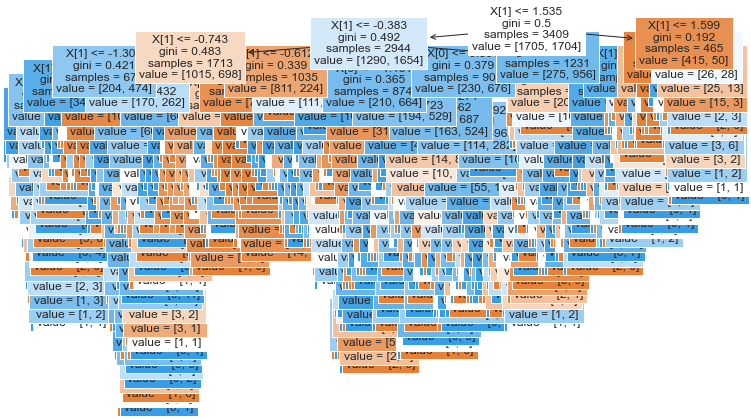

In [25]:
from sklearn import tree
plt.figure(figsize=(12,7))
tree.plot_tree(ct, filled=True, fontsize=12)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

In [27]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)

C:\Users\rakes\AppData\Local\Temp/ipykernel_18408/716668125.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


RandomForestClassifier()

In [28]:
Yhat = clf.predict(X_test)
print (Yhat)
# evaluate predictions
mae = mean_absolute_error(Y_test, Yhat)
print('MAE: %.3f' % mae)

[1 0 1 ... 1 1 1]
MAE: 0.131


In [29]:
accuracy_score(Y_test, Y_pred)

0.8692676249144422

In [30]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index =['author','source']).sort_values(ascending=False)
feature_imp

source    0.64768
author    0.35232
dtype: float64

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


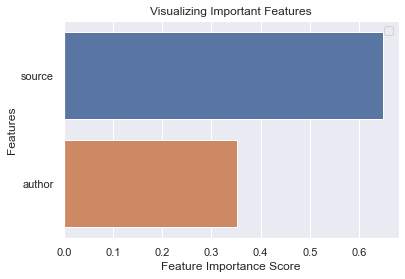

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()